In [50]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from collections import Counter as counter
import matplotlib.pyplot as plt

In [2]:
iris = pd.read_csv("iris.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [324]:
train, test = train_test_split(iris, test_size = 0.2)

In [325]:
train.shape, test.shape

((120, 5), (30, 5))

In [326]:
counter(train['species'])

Counter({'setosa': 41, 'versicolor': 38, 'virginica': 41})

In [327]:
counter(test['species'])

Counter({'setosa': 9, 'versicolor': 12, 'virginica': 9})

In [328]:
train_x = train[train.columns[:4]]
train_y = train[train.columns[4]]

### input layer - one hidden layer - output layer

In [329]:
def Activ_Fun(x): # Relu
    x[x<0]=0
    return x

In [330]:
def Softmax(x):
    a = np.exp(x)
    return(a/a.sum(axis=1).reshape(a.shape[0],1)) # 백터열 형태로 바꿔줘야 연산이된다 

In [407]:
#변수설정
w1 = np.random.randn(n_features, n_nodes) 
b1 = np.array(np.random.standard_normal(n_nodes))
w2 = np.random.randn(n_nodes, n_class)
b2 = np.array(np.random.standard_normal(n_class))

In [408]:
lr = 0.00001
n_features = train_x.shape[1]
n_class = len(train_y.unique())
n_nodes = 100

In [409]:
loss_record=[]
for _ in range(1000):
    # Calculating theloss
    hidden_1 = Activ_Fun(np.dot(train_x, w1)+b1)
    softmax = np.array(Softmax(np.dot(hidden_1, w2) + b2))
    one_hot = np.array(pd.get_dummies(train_y))
    loss = (-np.log(softmax) * one_hot).sum()
    loss_record.append(loss)
    
    # Backpropagation
    doutput2 = softmax - one_hot #  Deriative of Softmax
    dw2 = np.dot( hidden_1.transpose(), doutput2)
    db2 = doutput2.sum(axis=0)
    dhidden =  np.dot(doutput2, w2.transpose())
    dhidden[hidden_1<=0] =0 # Deriative of Relu
    doutput1 = dhidden
    dw1 = np.dot(train_x.transpose(), doutput1)
    db1 = doutput1.sum(axis=0)
    
    # update
    w2 = w2 - lr*dw2
    b2 = b2 - lr*db2
    w1 = w1 - lr*dw1
    b1 = b1 - lr*db1
loss_record[-50:]

[10.878735781808128,
 10.877013209561536,
 10.875293007748152,
 10.873575168870513,
 10.871859685471751,
 10.870146550135203,
 10.868435755484038,
 10.866727294180714,
 10.865021158926734,
 10.86331734246215,
 10.86161583756514,
 10.859916637051779,
 10.858219733775536,
 10.856525120626937,
 10.854832790533282,
 10.8531427364582,
 10.851454951401397,
 10.849769428398243,
 10.848086160519504,
 10.846405140871045,
 10.844726362593391,
 10.843049818861592,
 10.841375502884757,
 10.839703407905906,
 10.838033527201567,
 10.83636585408153,
 10.834700381888581,
 10.83303710399825,
 10.831376013818426,
 10.829717104789214,
 10.828060370382662,
 10.826405804102409,
 10.824753399483548,
 10.823103150092312,
 10.821455049525843,
 10.819809091411923,
 10.818171969399955,
 10.816541398240577,
 10.814912913959866,
 10.813286510173107,
 10.811662180557526,
 10.810039918842293,
 10.80841971880161,
 10.806801574250137,
 10.805185479039793,
 10.80357142705757,
 10.801959412224006,
 10.800349428491973,


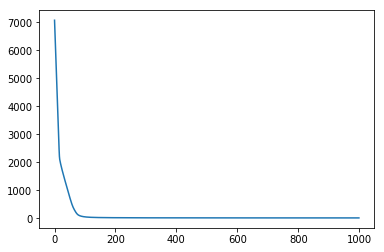

In [410]:
plt.plot(loss_record)
plt.show()

In [411]:
# test_set
pred_hidden_1 = Activ_Fun(np.dot(test[test.columns[:-1]], w1)+b1)
pred_softmax = np.array(Softmax(np.dot(pred_hidden_1, w2) + b2))
pred_index = pred_softmax.argmax(axis=1)
pred=[]
dic = {0:'setosa', 1:'versicolor', 2:'virginica'}
for t in pred_index:
    pred.append(dic[t])
print('Accuracy : ',(pred == test.species).sum()/ len(pred))

Accuracy :  0.9
